# Case Study on Regression

## Importing the important libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set

In [2]:
data=pd.read_csv('car_age_price.csv')

## Checking the basis details of data set

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data['Year'].nunique()


8

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data.shape

(112, 2)

## Scatter plot of year vs price to find the year wise distribution

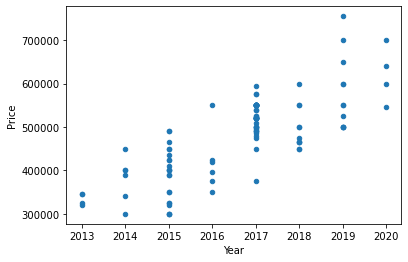

In [8]:
data.plot.scatter(x='Year',y='Price')
plt.show()

## Checking the null values in data set

In [9]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

## There are no null values in the dataset

## Checking fot ouliers in the price column

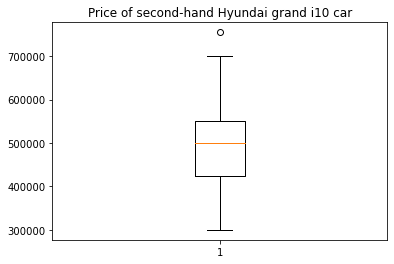

In [10]:
plt.boxplot(data['Price'])
plt.title('Price of second-hand Hyundai grand i10 car')
plt.show()

### There is only one outlier as visible from boxplot

## Finding the outlier using IQR method

In [11]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

422500.0 500000.0 550000.0


In [12]:
data['Price'].median()

500000.0

In [13]:
iqr=Q3-Q1
iqr

127500.0

In [14]:
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

231250.0 741250.0


In [15]:
outliers1=[]
for i in data['Price']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)
outliers1

[755000]

In [16]:
ind2=data['Price']>up_limit
data.loc[ind2].index

Int64Index([1], dtype='int64')

## There is only one outlier avaialble in the price column. The price is taken as target column. So the outlier cannot be dropped

## Checking for correlation in the data

In [17]:
corrmatrix=data.corr()

## Plotting the heat map

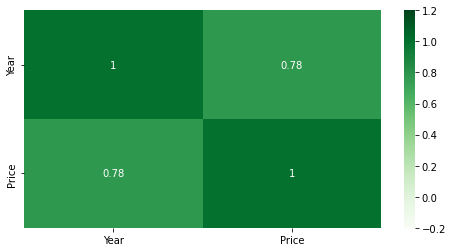

In [18]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,vmin=-0.2, vmax= 1.2,annot=True,cmap='Greens')
plt.show()

## Splitting the data into feature and target columns

In [19]:
#Feature Data set
x=data['Year']

#Target column
y=data['Price']

In [20]:
x

0      2018
1      2019
2      2019
3      2018
4      2018
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 112, dtype: int64

In [21]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

## Converting the array into dataframe which is suitable for linear regression model

In [22]:
x = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

## Dividing the data set into testing and training set 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Creating the linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
model1=lr.fit(X_train,Y_train)
predictions=model1.predict(X_test)

## Printing the Actual Price and Predicted price from the model as a Dataframe

In [27]:
X_test1 = list(np.concatenate(X_test).flat)
Y_test1 = list(np.concatenate(Y_test).flat)
y_pred = list(np.concatenate(predictions).flat)

In [28]:
df_new = pd.DataFrame({"Years": X_test1, "Actual_price": Y_test1, "Predicted price": y_pred})
df_new

,Years,Actual_price,Predicted price
0,2019,525000,600775.912521
1,2017,495000,505558.776905
2,2018,465000,553167.344713
3,2018,450000,553167.344713
4,2018,550000,553167.344713
5,2015,300000,410341.641289
6,2017,550000,505558.776905
7,2018,500000,553167.344713
8,2019,500000,600775.912521
9,2019,550000,600775.912521



## Finding the model checking values

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
print('The mean squared error values is:',mean_squared_error(Y_test,predictions))
print("RMSE value is:",np.sqrt(mean_squared_error(Y_test,predictions)))
print('the r squared value is:',r2_score(Y_test,predictions))

The mean squared error values is: 4326906256.829671
RMSE value is: 65779.22359552195
the r squared value is: 0.36759313425902185


### The MSE and RMSE values are higher because the price of second-hand Hyundai grand i10 car is given in lakhs.Even though the difference is less in terms of percentage, squaring it will increase the value range.In each year there is different price values in actual price(test) column but only one predicted price in Predicted price column. That is the reason for high MSE values.

## Predicting the value for the year 2022 using linear regression

In [31]:
prd = lr.predict([[2022]]) 
print('Price for the 2022 model grand i10 will be:%.2f'% prd)

Price for the 2022 model grand i10 will be:743601.62


## The price for the 2022 model second-hand grand i10 is obtained as 743601 from linear regression model

***

## LASSO REGRESSION MODEL

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [33]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model2=lasso.fit(X_train,Y_train)
Y_pred=model2.predict(X_test)

### The model is built by taking alpha parameter equal to 1

## Printing the Actual Price and Predicted price from the model as a Dataframe

In [34]:
Y_pred.shape

(23,)

In [35]:
Y_pred=Y_pred.reshape(23,1)

In [36]:
X_test2 = list(np.concatenate(X_test).flat)
Y_test2 = list(np.concatenate(Y_test).flat)
y_pred2 = list(np.concatenate(Y_pred).flat)

In [37]:
df_new = pd.DataFrame({"Years": X_test2, "Actual_price": Y_test2, "Predicted price": y_pred2})
df_new

,Years,Actual_price,Predicted price
0,2019,525000,600774.907473
1,2017,495000,505558.596274
2,2018,465000,553166.751873
3,2018,450000,553166.751873
4,2018,550000,553166.751873
5,2015,300000,410342.285075
6,2017,550000,505558.596274
7,2018,500000,553166.751873
8,2019,500000,600774.907473
9,2019,550000,600774.907473


## Finding the slope and intercepts of the lasso regression model

In [38]:
print('slope:%.2f' % lasso.coef_[0])

slope:47608.16


In [39]:
print('Intercepts:%.2f'%lasso.intercept_)

Intercepts:-95520091.25


### The slope is find out as 47608.16 and intercept as -95520091.25.So the eqaution of the line formed from lasso regression model will be Y=47608.16X-95520091.25

## Finding the lasso Regression coefficient of the model

In [40]:
X_train=Y=pd.DataFrame(X_train)
lasso_coeff = pd.DataFrame()
lasso_coeff['Year'] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

   Year  Coefficient Estimate
0     0            47608.1556


## The lasso regression coefficient is estimated as 47608.15 for the model

## Finding the model checking values

In [41]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error:',mean_squared_error(Y_test,Y_pred))
print("RMSE value is:",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('the r squared value is',r2_score(Y_test,Y_pred))

mean_squared_error: 4326859771.015669
RMSE value is: 65778.8702473345
the r squared value is 0.3675999284778446


### The MSE and RMSE values are higher because the price of second-hand Hyundai grand i10 car is given in lakhs.Even though the difference is less in terms of percentage, squaring it will increase the value range.In each year there is different price values in actual price(test) column but only one predicted price in Predicted price column. That is the reason for high MSE values in the case of lasso regession model also

## Predicting the value for the year 2022 using Lasso regression

In [42]:
prd = lasso.predict([[2022]]) 
print('Price for the 2022 model grand i10 will be:%.2f'% prd)

Price for the 2022 model grand i10 will be:743599.37


## The price for the 2022 model second-hand grand i10 is obtained as 743599 from lasso regession model

### Using the two predictions models using the  linear and lasso regression, the values for the year 2022 is obtained as 743601 and 743599 respectively.

###  The MSE values is obtained as 4326906256 for Linear and 4326859771 for lasso models.The RMSE values are 65779 and  65778 respectively .The R squared values are 0.36759 in both cases. The Lasso model is giving the slightly lesser error values than Linear Regession models.So lasso regression model is performing slightly better than linear regression model in this case.The data set taken is a smaller one. Working in a bigger data set will give better idea about both models

***
***